In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
from datetime import datetime

import sklearn.model_selection as skms
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading announcements
mazda=pd.read_json('dataset_mazda.json')

#### Preparation of the data set for the model

In [5]:
mazda_data = pd.get_dummies(mazda[['moc','przebieg','rok-produkcji','bezwypadkowy','pierwszy-wlasciciel',
                            'serwisowany-w-aso','bluetooth','czujnik-martwego-pola',
                            'klimatyzacja-dwustrefowa','system-start-stop','cena','rodzaj-paliwa',
                            'pochodzenie','oferta-od' ,'model-pojazdu'
                             ]])
mazda_data.head()

,moc,przebieg,rok-produkcji,bezwypadkowy,pierwszy-wlasciciel,serwisowany-w-aso,bluetooth,czujnik-martwego-pola,klimatyzacja-dwustrefowa,system-start-stop,...,model-pojazdu_MX-3,model-pojazdu_MX-5,model-pojazdu_MX-6,model-pojazdu_Premacy,model-pojazdu_Protege,model-pojazdu_RX-6,model-pojazdu_RX-7,model-pojazdu_RX-8,model-pojazdu_Tribute,model-pojazdu_Xedos
0,147.0,191000,2007,True,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,192.0,81000,2005,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,1,0,0
2,145.0,2,2019,True,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,120.0,31700,2016,True,True,True,True,False,False,True,...,0,0,0,0,0,0,0,0,0,0
4,175.0,82487,2015,False,True,True,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#replace empty values
mazda_data['moc'].fillna(-1, inplace=True)

In [7]:
# determining the characteristics and the target variable
x = mazda_data[['moc','przebieg','rok-produkcji','bezwypadkowy','pierwszy-wlasciciel','serwisowany-w-aso','bluetooth',
               'czujnik-martwego-pola','klimatyzacja-dwustrefowa','system-start-stop','rodzaj-paliwa_Benzyna',
                'rodzaj-paliwa_Benzyna+LPG','rodzaj-paliwa_Diesel','rodzaj-paliwa_Hybryda','pochodzenie_Polska',
                'pochodzenie_Sprowadzane','oferta-od_Firmy','oferta-od_Osoby prywatnej',
                'model-pojazdu_3','model-pojazdu_6' ,'model-pojazdu_CX-3','model-pojazdu_CX-30',
                'model-pojazdu_CX-5','model-pojazdu_CX-7','model-pojazdu_MX-5','model-pojazdu_5','model-pojazdu_2'
               ]].values
y = mazda_data[['cena']]

#x, y = shuffle(x, y)

x_train, x_test, y_train, y_test = skms.train_test_split(x, y, test_size=0.3, random_state=8)

#### Simple model

In [8]:
rf_reg = RandomForestRegressor()
rf_cvs = skms.cross_val_score(rf_reg, x_train, y_train, cv=5)
rf_reg.fit(x_train, y_train)
rf_score = rf_reg.score(x_test, y_test)

print('cross_val_score:', rf_cvs)
print("Score on train data (with 95%% conf. intervals): %0.2f (+/- %0.2f)" % (rf_cvs.mean(), rf_cvs.std() * 2))
print('Score on test data:', rf_score)

cross_val_score: [0.93285172 0.95083338 0.94568493 0.95406828 0.94959383]
Score on train data (with 95% conf. intervals): 0.95 (+/- 0.01)
Score on test data: 0.9467256091801695


#### Learning curve

In [9]:
# interval 
train_sizes = np.linspace(.01,1.0,11)
# model
rf_reg = RandomForestRegressor()
# learning_curve
(train_N,train_scores, test_scores) = skms.learning_curve(rf_reg, x, y.values.ravel(), cv=5, train_sizes=train_sizes)

# results from learning_curve
df = pd.DataFrame(test_scores, index=(train_sizes*100).astype(np.int))
df['Średnia 5-CV'] = df.mean(axis='columns')
df.index.name = "% użytych danych"

display(df)

,0,1,2,3,4,Średnia 5-CV
% użytych danych,,,,,,
1,0.745424,0.807876,0.783220,0.756296,0.816628,0.781889
10,0.912518,0.927145,0.930293,0.898600,0.933480,0.920407
20,0.931926,0.936999,0.941215,0.905586,0.943030,0.931751
30,0.937243,0.936105,0.935461,0.898502,0.936003,0.928663
40,0.938977,0.945418,0.946252,0.918660,0.949653,0.939792
50,0.936822,0.944966,0.950554,0.925922,0.951621,0.941977
60,0.938891,0.946782,0.947796,0.930727,0.952516,0.943342
70,0.947596,0.948372,0.948501,0.928584,0.954743,0.945559
80,0.947023,0.948704,0.949989,0.932014,0.955736,0.946693


In [10]:
# preparation of the results from learning_curve to present on the chart
def np_cartesian_product(*arrays):
    ndim = len(arrays)
    return np.stack(np.meshgrid(*arrays), axis=-1).reshape(-1, ndim)

neat_sizes = (train_sizes*100).astype(np.int)
labels = np_cartesian_product(neat_sizes, [0,1], np.arange(5))
score = np.concatenate([train_scores.flatten(), 
                        test_scores.flatten()], axis=0)
assert len(score) == len(labels)

df = pd.DataFrame.from_records(labels)
df.columns = ['pct', 'set', 'fold']
df.set = df.set.replace({0:'Trening', 1:'Test'})
df['score'] = score

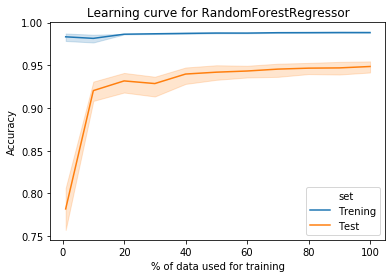

In [11]:
# learning_curve on the chart
ax = sns.lineplot(x='pct', y='score', hue='set', data=df)

ax.set_title("Learning curve for RandomForestRegressor")
ax.set_xlabel("% of data used for training")
ax.set_ylabel("Accuracy");